In [1]:
import xnemogcm
import xgcm
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import gsw
import cmocean.cm as cmo
import xarray as xr
from skimage.morphology import dilation
from skimage.morphology import disk
import cmasher as cmr
import matplotlib.colors as mcolors
xr.set_options(keep_attrs=True)
plt.rcParams['font.size']=16

In [2]:
# path to the stored data
path=('../../MAUD_RISE_config/maud_v4/m36_ke2/sdtb/')


In [3]:
! ls ../../MAUD_RISE_config/maud_v4/m36_ke2/sdtb/

sd_tc_2007_m36.nc  sd_tc_2016_m36.nc  tb_tc_2014_m36.nc  zc_tc_2012_m36.nc
sd_tc_2008_m36.nc  sd_tc_2017_m36.nc  tb_tc_2015_m36.nc  zc_tc_2013_m36.nc
sd_tc_2009_m36.nc  tb_tc_2007_m36.nc  tb_tc_2016_m36.nc  zc_tc_2014_m36.nc
sd_tc_2010_m36.nc  tb_tc_2008_m36.nc  tb_tc_2017_m36.nc  zc_tc_2015_m36.nc
sd_tc_2011_m36.nc  tb_tc_2009_m36.nc  zc_tc_2007_m36.nc  zc_tc_2016_m36.nc
sd_tc_2012_m36.nc  tb_tc_2010_m36.nc  zc_tc_2008_m36.nc  zc_tc_2017_m36.nc
sd_tc_2013_m36.nc  tb_tc_2011_m36.nc  zc_tc_2009_m36.nc
sd_tc_2014_m36.nc  tb_tc_2012_m36.nc  zc_tc_2010_m36.nc
sd_tc_2015_m36.nc  tb_tc_2013_m36.nc  zc_tc_2011_m36.nc


In [10]:
ds1=xr.open_mfdataset(path+'*.nc',chunks={'t':60})
ds2=xr.open_mfdataset('../../MAUD_RISE_config/maud_v4/m36_ke2/rev_data/MLD_mean_tc*_m36.nc',chunks={'t':60})
ds=xr.merge((ds1,ds2))
ds

<xarray.Dataset>
Dimensions:      (t: 4015)
Coordinates:
  * t            (t) datetime64[ns] 2007-01-01T12:00:00 ... 2017-12-31T12:00:00
    z_c          int64 49
Data variables:
    sd_tc        (t) float64 dask.array<chunksize=(60,), meta=np.ndarray>
    tb_tc        (t) float64 dask.array<chunksize=(60,), meta=np.ndarray>
    zc_tc        (t) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    MLD_mean_tc  (t) float32 dask.array<chunksize=(31,), meta=np.ndarray>

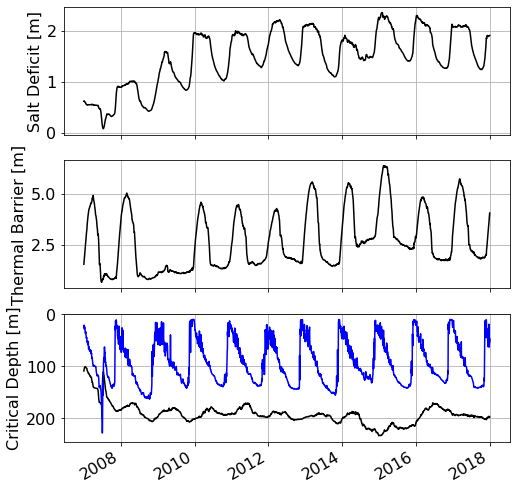

In [12]:
rd=60
fig,axes=plt.subplots(3,1,figsize=(8,8),sharex=True)
ax=axes[0]
ds.sd_tc.plot(x='t',ax=ax,color='k')
ax.set_ylabel('Salt Deficit [m]')
ax.set_xlabel('')
ax.set_title('')
ax.grid()
ax=axes[1]
ds.tb_tc.plot(x='t',ax=ax,color='k')
ax.set_ylabel('Thermal Barrier [m]')
ax.set_xlabel('')
ax.set_title('')
ax.grid()
ax=axes[2]
ds.zc_tc.plot(x='t',ax=ax,color='k')
ds.MLD_mean_tc.plot(x='t',ax=ax,color='b')
ax.set_ylabel('Critical Depth [m]')
ax.set_xlabel('')
ax.set_title('')
ax.invert_yaxis()
ax.grid()